# Sympy - A first glance

Sympy is a Python library that primarily deals with **symbolic mathematics**.  By this we mean formal algebraic expressions, such as:

 * Polynomials $x^3+3x-2$
 * Abstract functional expressions $\sin(x), e^x, \frac{\sin x}{\tan^2 x + 3x^2 + 1}$, etc.
 * Operations on these expressions, such as: 
   - Root finding, in **closed form** when it is possible.
   - Differentiation, integration.
   - Solving systems of non-linear equations in "closed form" i.e. going from expressions like $x^2=2$ to $x = \pm \sqrt{2}$. 
   - Finding **closed form** solutions to differential equations, when they exist, such as going from $y'=y$ to $y(t) = ke^t$. 
   
Sympy is capable of much more than the above, but these are some of its most basic features.

## Before we begin -- numbers and data types in Python

Simple things like numbers have multiple representations in Python.  

For example, in your second quiz you wrote an algorithm that divides an integer by 2.  Let's look at various ways Python can deal with this.

In [1]:
print(3/2)
print(type(3/2))

1.5
<class 'float'>


### 3/2 in Python

In Python, the **division** operation is implemented in a way that closely mimics how we use it in practice.  But there are also compromises to ensure it isn't an *expensive* computation to do in large quantities.

Given two integers $m$ and $n$, Python implements $m/n$ as a **float**. **float** (short for floating-point) data types are an imprecise data type and this can lead to problems.  We will talk more about this later.   

What if you want **integer division**?  By this I am referring to the <a href="https://en.wikipedia.org/wiki/Division_algorithm">**division algorithm**</a>. This states that given any integer $n$, and any positive integer $d$ (the **denominator**), there are unique integers $q$ (the **quotient**) and $r$ the **remainder** so that

$$ n = q\cdot d + r \ \ \ 0 \leq r < d. $$

Another way to say this is

$$ \frac{n}{d} = q + \frac{r}{d}$$

i.e. the division algorithm is a procedure to write an arbitrary fraction as a **reduced fraction**, where this means $0 \leq \frac{r}{d} < 1$.

For example $n=3, d = 2$

$$ 3 = 1 \cdot 2 + 1 $$

For $n=13, d = 3$

$$ 13 = 4 \cdot 3 + 1 $$

The Python operations for the division algorithm are $//$ and $\%$.


In [2]:
5//2

2

In [3]:
5%2

1

### isinstance and type

Often times the simplest way to figure out how Python interprets your expression is via the **type** and **isinstance** commands. 

The **type** gives you the name of the underlying Python data type of an object.

In [4]:
isinstance(5, int)

True

**isinstance** allows you to check if an object is of a specific type. This is a useful command to protect a function against mis-use.

## Changing gears -- basic Sympy examples

In [9]:
import sympy as sp
x = sp.Symbol('x')

print(x)
print(x**2)
sp.pprint(x**2)

x
x**2
 2
x 


In [22]:
f = x**3 + sp.sin(x)

## Sympy types

Sympy types at first appear a little confusing.  We will discuss how to interpret them next week.  Even *the same* mathematical object can have different sympy types!

Similarly, Sympy's notion of equality is perhaps not what one might expect.  We will also discuss this in more detail next week.

In [23]:
F = sp.lambdify(x, f)

In [39]:
F(1)

fresnels(x)

Sympy algebraic expressions like $\sin(x)+x^2$ are not callable functions, so one might imagine **what is the point of using Sympy** if you can't use algebraic expressions for their purpose?

Sympy allows us to convert their Sympy algebraic expressions into callable functions, with the lambdify command.

In [25]:
fp = sp.diff(f,x )

In [26]:
sp.pprint(fp)

   2         
3⋅x  + cos(x)


In [27]:
fi = sp.integrate(f, x)
sp.pprint(fi)

 4         
x          
── - cos(x)
4          


In [29]:
f = sp.sin(x**2)
F = sp.integrate(f, x)
sp.pprint(f)
sp.pprint(F)

   ⎛ 2⎞
sin⎝x ⎠
                ⎛√2⋅x⎞       
3⋅√2⋅√π⋅fresnels⎜────⎟⋅Γ(3/4)
                ⎝ √π ⎠       
─────────────────────────────
           8⋅Γ(7/4)          


In [45]:
F = sp.lambdify(x, sp.fresnels(x), 'mpmath')
F(0.1)

mpf('0.00052358954761221065')

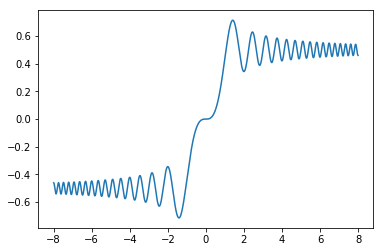

In [47]:
import mpmath as mp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

dom = np.linspace(-8, 8 , 1000)
plt.plot(dom, [F(i) for i in dom])

### Advantage of Sympy algebraic expressions

Sympy allows for many basic operations on algebraic expressions, like differentiation and integration.

In [52]:
f = sp.exp(sp.exp(-x**2))
sp.pprint(f)
F = sp.integrate(f, x)
sp.pprint(F)

 ⎛   2⎞
 ⎜ -x ⎟
 ⎝ℯ   ⎠
ℯ      
⌠           
⎮  ⎛   2⎞   
⎮  ⎜ -x ⎟   
⎮  ⎝ℯ   ⎠   
⎮ ℯ       dx
⌡           


## Asking sympy to solve equations

Sympy has some fairly sophisticated algorithms to solve polynomial equations. It uses these algorithms to build tools to solve (symbolically) a wide array of equations, even ones that are not polynomial. 

Sympy can:

 * Factor polynomials.
 * Find roots of polynomials, symbolically as well as numerically. 
 * Solve (symbolically as well as numerically) simultaneous polynomial equations.
 * Solve simultaneous equations that are not polynomial
    

In [55]:
p = x**2 - 2
sp.pprint(sp.solve(p, x))

[-√2, √2]


In [61]:
a,b,c = sp.symbols('a b c')
p = a*x**2 + b*x + c
sp.pprint(p)
print()
sp.pprint(sp.solve(p, x))

   2          
a⋅x  + b⋅x + c

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


In [64]:
p = -1*x**2 + 1*x + 1
P = sp.Poly(p,x).coeffs()
print(P)

[-1, 1, 1]


In [65]:
np.roots(P)

array([ 1.61803399, -0.61803399])

In [66]:
mpmpmpmpmpm = treu

NameError: name 'treu' is not defined

In [69]:
y = sp.Symbol("y")
sol = sp.solve([x**2 + y**2 - 4, x*y-1])
for S in sol:
        sp.pprint(S)
        print('\n')

⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫
⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬
⎩                                                                      ⎭


⎧    ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫
⎨x: -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬
⎩                                                                    ⎭


⎧   ⎛       ________⎞   ________ ⎛    ________    ⎞        ________⎫
⎨x: ⎝-2 - ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬
⎩                                                                  ⎭


⎧    ⎛       ________⎞   ________ ⎛  ________    ⎞       ________⎫
⎨x: -⎝-2 + ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬
⎩                                                                ⎭


